Githubs repository : https://github.com/liuring1123/TOOL1_FINAL_PROJECT

# Trends of mortality of cardiovascular disease (heart disease and stroke) over years in US

## 1.Dataset and motivation


- This study utilized data obtained from the National Vital Statistics System，with the information available at the following source: https://data.cdc.gov/Heart-Disease-Stroke-Prevention/Rates-and-Trends-in-Heart-Disease-and-Stroke-Morta/7b9s-s8ck


- The dataset captures rates and trends in heart disease and stroke mortality rate from 2000 to 2019. And rates have been age-standardized in 10-year age groups using the 2010 US population. 


- This report provides state (or state equivalent) estimates of heart disease and stroke death rate, considering:
    - Age groups: ages 35–64 years, ages 65 years and older
    - Race/ethnicity: non-Hispanic American Indian/Alaska Native, non-Hispanic Asian/Pacific Islander, non-Hispanic Black, Hispanic, non-Hispanic White and overall
    - Gender: women, men and overall 
    - States



## 2. Actual task definition & research question

This study aims to investigate the influence of age, race, gender, and regional factors on the mortality rate of heart disease and analyze the trends in mortality rate changes over the past 20 years. Building upon the data from previous occurrences, the study seeks to provide insights into potential areas of concern for the future.


## 3. Literature review

Other studies predominantly focus on physiological factors, such as weight, blood lipids, and other micro-level indicators, influencing the mortality rate of heart disease. In contrast, this study takes a macro perspective, analyzing differences in heart disease mortality rates across population, time, and geographic dimensions. The aim is to gain a comprehensive understanding of related trends.

## 4. Quality of cleaning

In [34]:
import pandas as pd 
import numpy as np

### 4.1 Import data from csv file

In [35]:
# the csv file can be downloaded from https://data.cdc.gov/Heart-Disease-Stroke-Prevention/Rates-and-Trends-in-Heart-Disease-and-Stroke-Morta/7b9s-s8ck 
data = pd.read_csv('Rates_and_Trends_in_Heart_Disease_and_Stroke_Mortality_Among_US_Adults__35___by_County__Age_Group__Race_Ethnicity__and_Sex___2000-2019.csv', low_memory=False)
data.sample(5)

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
4456425,2012,TX,Kinney,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Overall,Sex,Women,48271
5368799,1999 - 2010,IL,Iroquois,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,%,Total percent change,...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,17075
4221541,2008,TN,Wayne,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Black (Non-Hispanic),Sex,Overall,47181
1827057,2007,KY,Robertson,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,American Indian/Alaska Native,Sex,Overall,21201
5568790,2010 - 2019,NY,Tompkins,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NaN,%,Total percent change,...,Value suppressed,NaN,NaN,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,36109


In [36]:
print(data.dtypes)
print(data.shape)

Year                           object
LocationAbbr                   object
LocationDesc                   object
GeographicLevel                object
DataSource                     object
Class                          object
Topic                          object
Data_Value                    float64
Data_Value_Unit                object
Data_Value_Type                object
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Confidence_limit_Low          float64
Confidence_limit_High         float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
StratificationCategory3        object
Stratification3                object
LocationID                      int64
dtype: object
(5770240, 21)


### 4.2 Sorted data

In [37]:
data_sorted = data.sort_values(by=['Year','LocationAbbr'])
data_sorted.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
112560,1999,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,All heart disease,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,2013
112596,1999,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,All stroke,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,2013
112620,1999,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,2013
112637,1999,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Cardiovascular disease (CVD),NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,2013
112660,1999,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart failure,NaN,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NaN,NaN,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,2013


### 4.3 Remove non-interesting columns
The columns 'LocationDesc' and 'LocationID,' which provide detailed geographic information down to the county level, have been excluded from this study as the focus is solely on the state level. Additionally, other columns with only one value describing other columns have been removed.

In [38]:

data_cleaned = data_sorted.drop(columns=['LocationDesc', 'GeographicLevel', 'DataSource', 'Class', 'Data_Value_Unit','Data_Value_Type','Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StratificationCategory1', 'StratificationCategory2', 'StratificationCategory3', 'LocationID'])
data_cleaned.head()

,Year,LocationAbbr,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Stratification1,Stratification2,Stratification3
112560,1999,AK,All heart disease,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
112596,1999,AK,All stroke,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
112620,1999,AK,Coronary heart disease (CHD),NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
112637,1999,AK,Cardiovascular disease (CVD),NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall
112660,1999,AK,Heart failure,NaN,NaN,NaN,Ages 35-64 years,American Indian/Alaska Native,Overall


In [39]:
data_cleaned.shape

(5770240, 9)

### 4.4 Drop the samples with empty Data_value

The 'Date_value' feature represents the number of patients who died from corresponding cardiovascular diseases per 100,000 people. It is a crucial variable in this study. Therefore, rows with missing data in the 'Data_value' column have been removed from the dataset. The 'Confidence_limit_low' and 'COnfidence_limit_High' features are related with 'Date_value' feature. If rows with missing data in the 'Data_value' column, then those rows also with missing data in 'Confidence_limit_low' and 'COnfidence_limit_High' columns.

In [40]:
data_cleaned.isnull().sum()

Year                           0
LocationAbbr                   0
Topic                          0
Data_Value               2365475
Confidence_limit_Low     2365475
Confidence_limit_High    2365475
Stratification1                0
Stratification2                0
Stratification3                0
dtype: int64

In [41]:
data_dropna = data_cleaned.dropna()
data_dropna.sample(5) 

,Year,LocationAbbr,Topic,Data_Value,Confidence_limit_Low,Confidence_limit_High,Stratification1,Stratification2,Stratification3
256603,2005,AR,Heart failure,592.0,481.2,707.8,Ages 65 years and older,Overall,Men
1623089,2016,KS,Heart failure,13.3,10.0,16.5,Ages 35-64 years,Overall,Overall
5671884,2010 - 2019,TX,Cardiovascular disease (CVD),20.9,4.1,53.7,Ages 35-64 years,Overall,Women
2394118,2007,MS,All heart disease,189.2,163.4,216.5,Ages 35-64 years,Overall,Overall
3112226,2016,NY,All stroke,89.6,62.0,131.5,Ages 65 years and older,American Indian/Alaska Native,Overall


In [42]:
data_dropna.shape

(3404765, 9)

In [43]:
new_column_names = {'Topic': 'Disease_Name',
                    'Stratification1': 'Age',
                    'Stratification2': 'Race',
                    'Stratification3': 'Gender'}
data_rename = data_dropna.rename(columns = new_column_names)
data_rename.head()

,Year,LocationAbbr,Disease_Name,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age,Race,Gender
112684,1999,AK,All heart disease,38.7,26.5,59.8,Ages 35-64 years,Overall,Overall
112702,1999,AK,All stroke,26.4,17.2,39.5,Ages 35-64 years,Overall,Overall
112726,1999,AK,Coronary heart disease (CHD),37.0,26.7,52.9,Ages 35-64 years,Overall,Overall
112746,1999,AK,Cardiovascular disease (CVD),64.2,48.5,100.7,Ages 35-64 years,Overall,Overall
112766,1999,AK,Heart failure,9.8,5.9,19.1,Ages 35-64 years,Overall,Overall


In [44]:
data_total = data_rename[~data_rename['Year'].isin(['1999 - 2010', '2010 - 2019'])]
print(data_total.shape)

(3108720, 9)


## 5. Visualiztion 


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 5.1 Plots showing Data value depending on age, race and gender

The variable 'Disease_name' comprises five categories: 'all heart disease,' 'all stroke,' 'coronary heart disease (CHD),' 'cardiovascular disease (CVD),' and 'heart failure.' It is evident that these categories both encompass and distinguish each other. I hypothesize that identifying the specific cause of death might be challenging, often involving a combination of factors such as stroke and heart failure. Consequently, to prevent potential data overlap, I have chosen not to aggregate these categories. Instead, I will analyze them separately in the remaining part of the study.

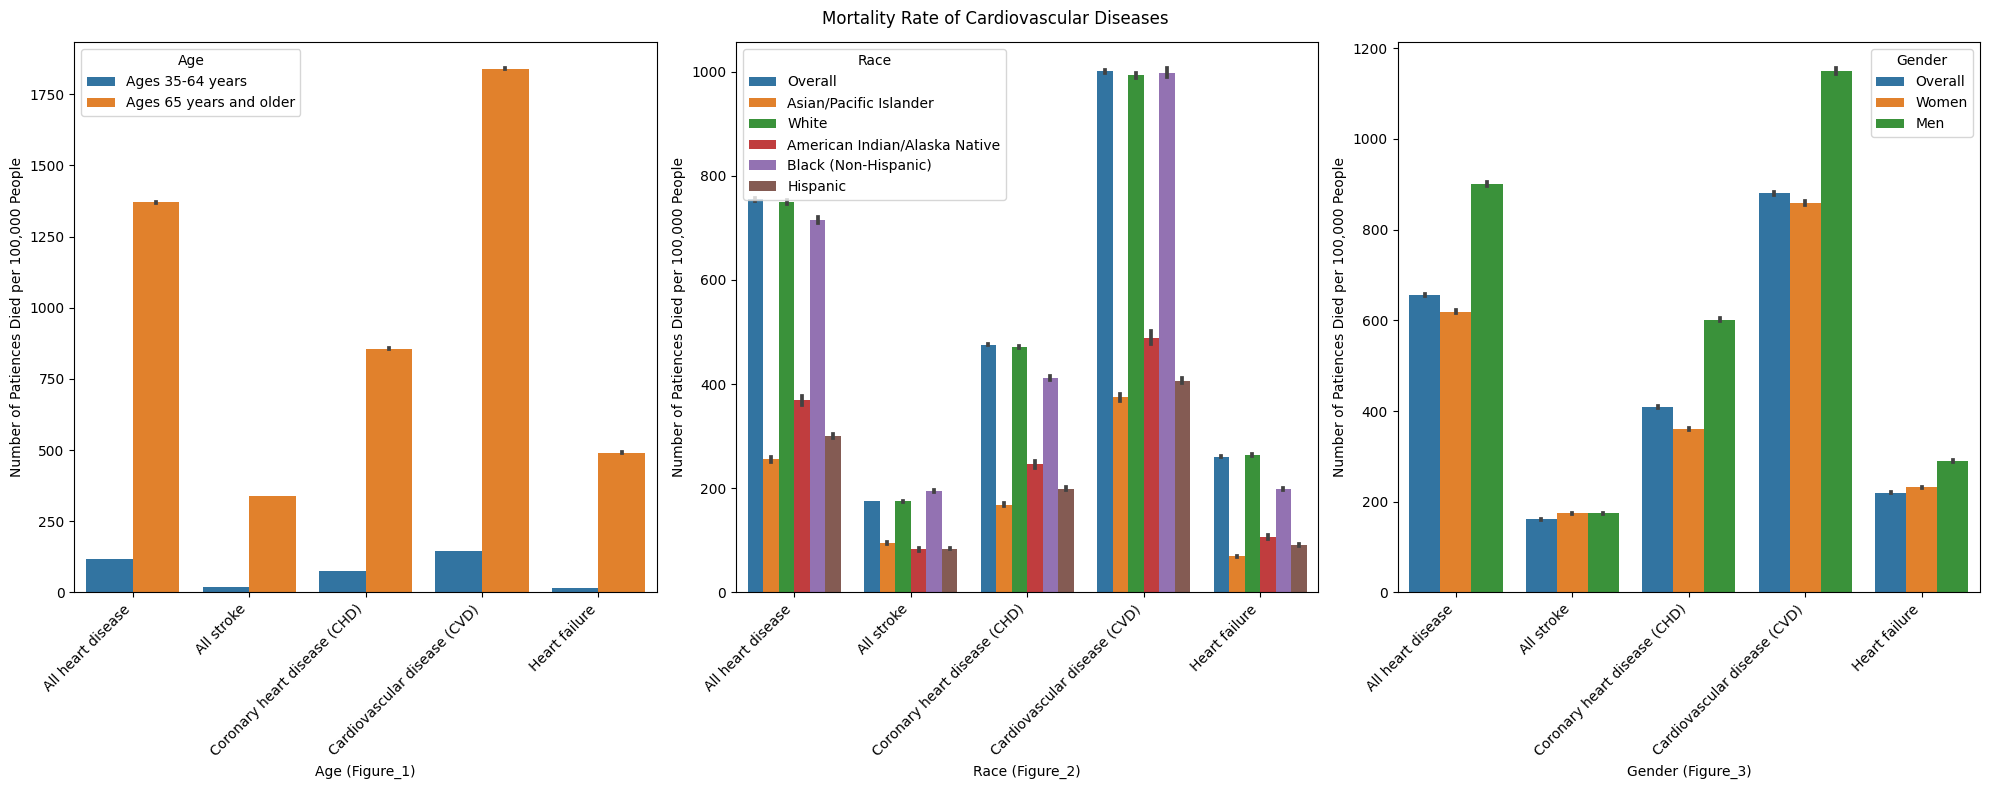

In [46]:
#Plots 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 8))
fig.suptitle('Mortality Rate of Cardiovascular Diseases')

sns.barplot(data= data_total, x = 'Disease_Name', hue = 'Age',y = 'Data_Value', ax = ax1)
ax1.set_ylabel('Number of Patiences Died per 100,000 People')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_xlabel('Age (Figure_1)')

sns.barplot(data= data_total, x = 'Disease_Name', hue = 'Race',y = 'Data_Value', ax = ax2)
ax2.set_ylabel('Number of Patiences Died per 100,000 People')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_xlabel('Race (Figure_2)')

sns.barplot(data= data_total, x = 'Disease_Name', hue = 'Gender',y = 'Data_Value', ax = ax3)
ax3.set_ylabel('Number of Patiences Died per 100,000 People')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.set_xlabel('Gender (Figure_3)')

plt.tight_layout()
plt.show()

##### 5.1.1. Age
Based on Figure_1, it is evident that among every 100,000 individuals, the number of people aged older than 65 who died from cardiovascular-related diseases is significantly higher than in the younger age group. According to data from the 2010 US Census Bureau, the population aged 35 to 64 comprises 39.5% of the total population, while the population aged 65 and older makes up 12.7% of the total population. This suggests that the death rate (number of individuals who died in a specific age group divided by the total number of individuals in that group) is considerably higher in the older age group compared to the younger group.

##### 5.1.2. Race
Based on Figure_2, it is evident that Black (Non-Hispanic) and White individuals exhibit higher rates than the other three racial groups across all five types of cardiovascular diseases. However, considering data from the 2010 US Census Bureau, where the population of White alone is 61.6%, Black African alone is 12.4%, American Indian and Alaska Native alone is 1.1%, Asian alone is 6.0%, and other alone is 0.2% of the total population in 2010, it's important to note that the higher rates observed in Black and White populations may be influenced by their larger representation in the overall population.

Due to the significant population size of the White race, it cannot be definitively concluded that the death rate of White individuals is higher than that of other racial groups. Furthermore, individuals who identify with two or more races are not explicitly mentioned in the data collection process, making it challenging to draw conclusions about the mortality rate of cardiovascular diseases among this diverse group.

##### 5.1.3. Gender
Based on Figure_3, it is evident that male individuals exhibit higher rates than females across three types of cardiovascular diseases: all heart disease, coronary heart disease (CHD), and cardiovascular disease (CVD). According to data from the 2010 US Census Bureau, the ratio of females to males is 1.03:1, indicating a very close balance in 2010. Consequently, in the case of these three diseases, male individuals appear to face a higher likelihood of mortality compared to females.

Given that age, specifically those younger than 65 and older than 65, has a significant impact on the mortality rate of cardiovascular-related diseases, the next phase of my study will delve into these two age groups. The objective is to examine the trends in their changes over the years.

In [47]:
data_young_age = data_total[data_total['Age'] == 'Ages 35-64 years']
data_old_age = data_total[data_total['Age'] == 'Ages 65 years and older']
print(data_young_age.shape)
print(data_old_age.shape)

(1672050, 9)
(1436670, 9)


### 5.2. The trend in mortality rate changes over the years

##### 5.2.1. Age 35-64 years group

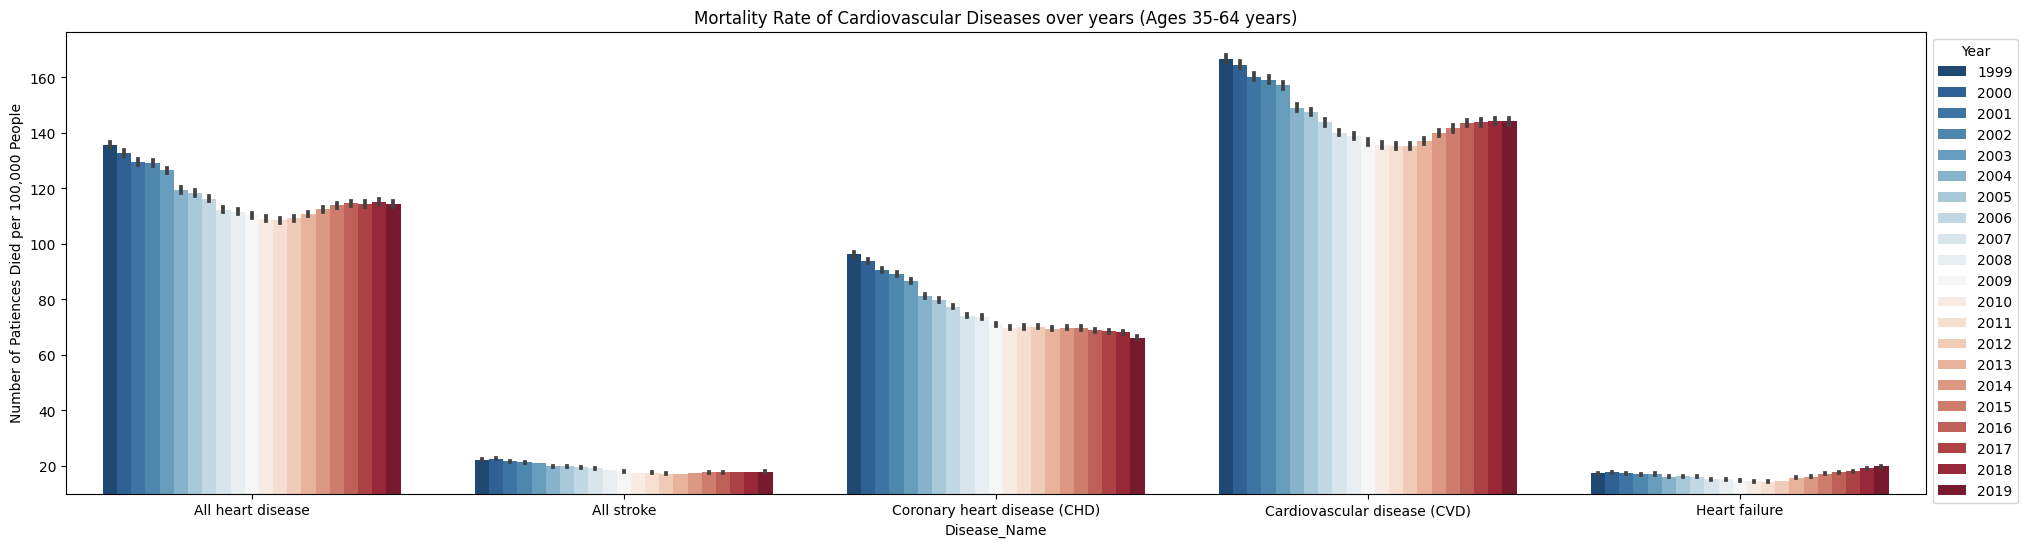

In [48]:
# Age 35-64 years group
plt.figure(figsize=(24, 6))
sns.barplot(data= data_young_age, x = 'Disease_Name', hue = 'Year', y = 'Data_Value', palette='RdBu_r')
plt.title('Mortality Rate of Cardiovascular Diseases over years (Ages 35-64 years)')
plt.ylabel('Number of Patiences Died per 100,000 People')
# plt.xticks(rotation = 45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Year')
plt.ylim(10, None)
plt.show()

In the age group of 35 to 64, the mortality rates for 'all stroke' and 'heart failure' remain relatively stable. 'All heart disease,' 'coronary heart disease (CHD),' and 'cardiovascular disease (CVD)' show a trend of initial decline followed by an increase, but the magnitude of these changes is minimal. The variations observed, ranging from highest to lowest, are only around 30 individuals, which could stem from statistical errors or possibly the result of a small base number of deaths.

##### 5.2.2. Age 65 years and older group

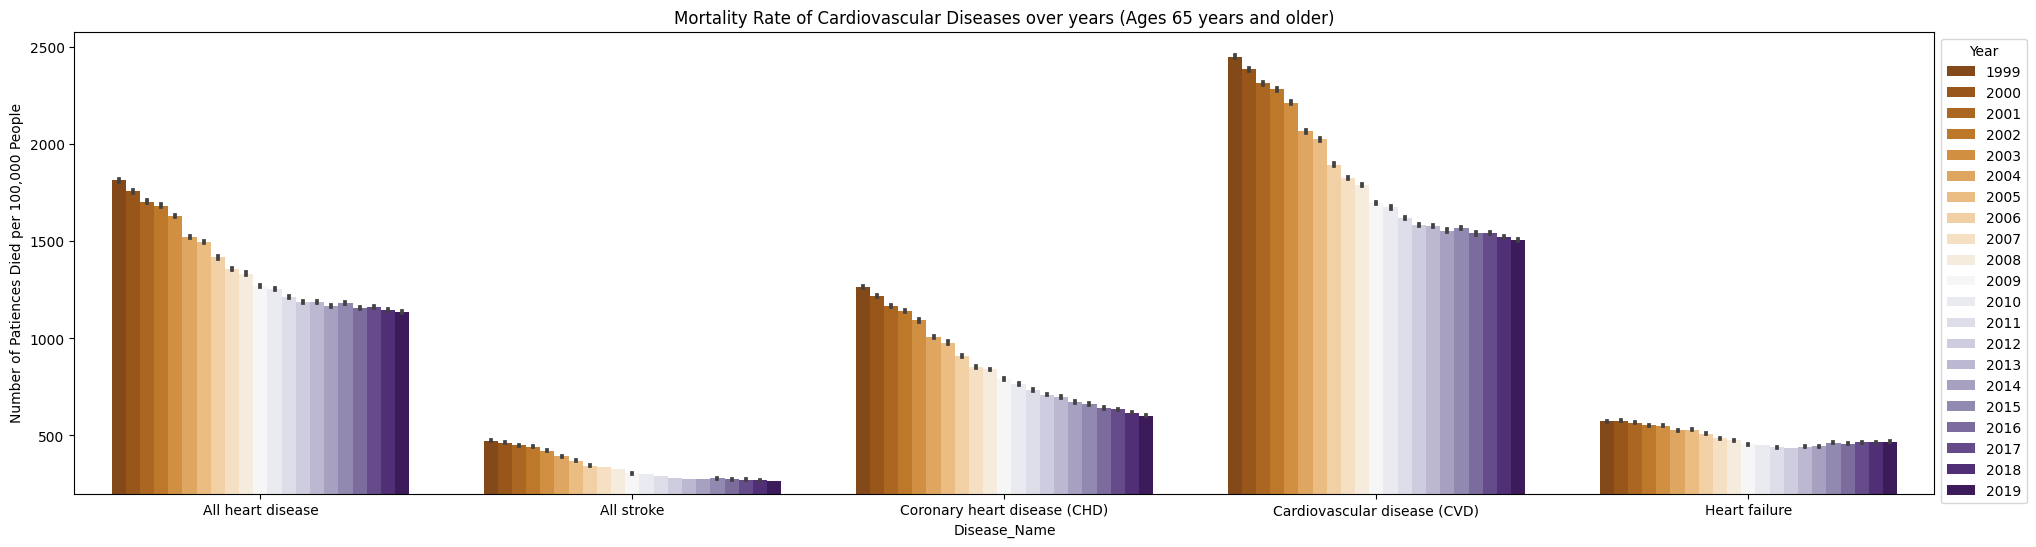

In [49]:
# Age 65 years and older group
plt.figure(figsize=(24, 6))
sns.barplot(data= data_old_age, x = 'Disease_Name', hue = 'Year', y = 'Data_Value', palette='PuOr')
plt.title('Mortality Rate of Cardiovascular Diseases over years (Ages 65 years and older)')
plt.ylabel('Number of Patiences Died per 100,000 People')
# plt.xticks(rotation = 45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Year')
plt.ylim(200, None)
plt.show()

In contrast to the results observed in the 35 to 64 age group, among individuals aged 65 and older, the mortality rates for all five types of cardiovascular diseases have been consistently decreasing year by year. Given the small base numbers for 'all stroke' and 'heart failure,' the decline in these rates is not substantial. However, for the other three diseases, there is a significant downward trend.

Apart from age and time factors, is there a specific geographical distribution of mortality rates? To explore this, the upcoming analysis will examine variations in mortality rates among different states.

### 5.3 The distribution of mortality rate across the country

In [50]:
import geopandas as gpd
import folium 
from folium.plugins import StripePattern
states = gpd.read_file('us-states.json').rename(columns={'name':'state'})
states.head()

,id,state,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [51]:
df_total_location = pd.merge(states, data_total, how='inner', left_on='id', right_on='LocationAbbr')
df_total_location.head(5)

,id,state,geometry,Year,LocationAbbr,Disease_Name,Data_Value,Confidence_limit_Low,Confidence_limit_High,Age,Race,Gender
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",1999,AL,All heart disease,155.7,126.0,182.2,Ages 35-64 years,Overall,Overall
1,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",1999,AL,All stroke,26.0,20.2,33.3,Ages 35-64 years,Overall,Overall
2,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",1999,AL,Coronary heart disease (CHD),98.0,78.7,132.8,Ages 35-64 years,Overall,Overall
3,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",1999,AL,Cardiovascular disease (CVD),192.5,165.0,239.0,Ages 35-64 years,Overall,Overall
4,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",1999,AL,Heart failure,27.5,19.8,45.4,Ages 35-64 years,Overall,Overall


In [52]:
df_total_location.drop(columns=['Year', 'LocationAbbr', 'Confidence_limit_Low','Confidence_limit_High', 'Race', 'Gender'], inplace= True)
df_total_location.head()

,id,state,geometry,Disease_Name,Data_Value,Age
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",All heart disease,155.7,Ages 35-64 years
1,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",All stroke,26.0,Ages 35-64 years
2,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Coronary heart disease (CHD),98.0,Ages 35-64 years
3,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Cardiovascular disease (CVD),192.5,Ages 35-64 years
4,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Heart failure,27.5,Ages 35-64 years


##### 5.3.1. Age 35-64 years group

In [53]:
df_young = df_total_location[df_total_location['Age']=='Ages 35-64 years']
df_old = df_total_location[df_total_location['Age']=='Ages 65 years and older']
print(df_young.shape)
print(df_old.shape)

(1671210, 6)
(1435935, 6)


In [54]:
average_rate_by_state_disease_young = df_young.groupby(['id', 'Disease_Name'])['Data_Value'].mean().reset_index()
average_rate_by_state_disease_young['Data_Value'] = average_rate_by_state_disease_young['Data_Value'].round(2)
df_average_young = pd.merge(df_young, average_rate_by_state_disease_young, on=['id', 'Disease_Name'], how='left', suffixes=('', '_average'))
df_average_young.drop(columns=['Data_Value'], inplace= True)
df_yound_clean = df_average_young.drop_duplicates().reset_index(drop=True)
df_yound_clean.head()

,id,state,geometry,Disease_Name,Age,Data_Value_average
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",All heart disease,Ages 35-64 years,173.65
1,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",All stroke,Ages 35-64 years,29.33
2,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Coronary heart disease (CHD),Ages 35-64 years,79.99
3,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Cardiovascular disease (CVD),Ages 35-64 years,217.94
4,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Heart failure,Ages 35-64 years,30.08


In [55]:
import plotly.express as px
disease_list = ['All heart disease', 'Cardiovascular disease (CVD)','Coronary heart disease (CHD)', 'All stroke', 'Heart failure']
for disease in disease_list:
    df= df_yound_clean[df_yound_clean['Disease_Name'] == disease]
    min_value = df['Data_Value_average'].min()
    max_value = df['Data_Value_average'].max()
    df.dtypes

    fig = px.choropleth(df, 
                        geojson = df.geometry, 
                        locations = df.id, 
                        locationmode='USA-states',
                        color = df.Data_Value_average,
                        color_continuous_scale = 'GnBu', 
                        range_color = (min_value, max_value),
                        scope = 'usa',
                        width=1000,  
                        height=800)

    fig.update_layout(margin={'r':0, 't': 50, 'l': 0, 'b':0}, 
                    coloraxis_colorbar_title='Number of people died per 100,000 people',
                    title= {'text': f'Mortality Rate of {disease} over years (Ages 35-64 years)', 
                            'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top', 'xref': 'paper'},
                    height = 600)
    fig.show()

According to the distribution maps presented above, it is evident that the incidence of heart disease in the 35 to 64 age group is more concentrated in the southern regions, particularly in Mississippi and Alabama.

##### 5.3.2. Age 65 or older group

In [56]:
average_rate_by_state_disease_old = df_old.groupby(['id', 'Disease_Name'])['Data_Value'].mean().reset_index()
average_rate_by_state_disease_old['Data_Value'] = average_rate_by_state_disease_old['Data_Value'].round(2)
df_average_old = pd.merge(df_old, average_rate_by_state_disease_old, on=['id', 'Disease_Name'], how='left', suffixes=('', '_average'))
df_average_old.drop(columns=['Data_Value'], inplace= True)
df_old_clean = df_average_old.drop_duplicates().reset_index(drop=True)
df_old_clean.head()

,id,state,geometry,Disease_Name,Age,Data_Value_average
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",All heart disease,Ages 65 years and older,1662.10
1,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",All stroke,Ages 65 years and older,385.38
2,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Coronary heart disease (CHD),Ages 65 years and older,743.74
3,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Cardiovascular disease (CVD),Ages 65 years and older,2172.64
4,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Heart failure,Ages 65 years and older,598.27


In [57]:
for disease in disease_list:
    df= df_old_clean[df_yound_clean['Disease_Name'] == disease]
    min_value = df['Data_Value_average'].min()
    max_value = df['Data_Value_average'].max()
    df.dtypes

    fig = px.choropleth(df, 
                        geojson = df.geometry, 
                        locations = df.id, 
                        locationmode='USA-states',
                        color = df.Data_Value_average,
                        color_continuous_scale = 'Oranges', 
                        range_color = (min_value, max_value),
                        scope = 'usa',
                        width=1000,  
                        height=800)

    fig.update_layout(margin={'r':0, 't': 50, 'l': 0, 'b':0}, 
                    coloraxis_colorbar_title='Number of people died per 100,000 people',
                    title= {'text': f'Mortality Rate of {disease} over years (Ages older than 65 years)', 
                            'x': 0.5, 'y': 0.95, 'xanchor': 'center', 'yanchor': 'top', 'xref': 'paper'},
                    height = 600)
    fig.show()

In contrast to the higher mortality rates in the southern region for various types of heart diseases in the 35-64 age group, the distribution varies across the nation for individuals aged 65 and older group.

- All heart disease: high mortality rates persist in the southern states of Mississippi, Alabama, Arkansas, and Louisiana.
- Cardiovascular disease (CVD): exhibits elevated rates nationwide, with Mississippi and its surrounding areas having the highest rates.
- Coronary heart disease (CHD): shows the highest rates in New Jersey, followed by Arizona, with other states significantly lower.
- All stroke: demonstrates a more dispersed pattern without a clear regional concentration, though Kentucky and Oklahoma have the highest mortality rates, along with neighboring states.
- Heart failure: it's evident that Arizona and New Jersey, along with the northeastern region, have the lowest mortality rates. Mississippi stands out with the highest rates, gradually decreasing from its center to the surrounding areas. Overall, the differences are not substantial, ranging from 700 to 400.

## Conclusion

In summary, age emerges as a crucial factor influencing the mortality rates of various heart diseases. This association aligns with the understanding that as individuals get older, organ function and metabolism gradually decline. This decline becomes more pronounced, especially after the age of 65, contributing to the significantly higher mortality rates for heart diseases in the elderly compared to younger age groups.

For the current dataset, it's challenging to determine the impact of race on heart disease mortality rates. The lack of information on the population distribution of each race in different states during the data collection process limits the ability to draw conclusions. Exploring additional resources online may provide more insights, but variations in data sources may introduce inconsistencies, making it difficult to assert that certain races.

Gender differences in mortality rates primarily manifest in all heart disease, coronary heart disease (CHD), and cardiovascular diseases. This could be linked to higher rates of alcohol and tobacco consumption among males or may be attributed to physiological differences between males and females.

From a temporal perspective, over the period from 1999 to 2019, there is an overall decreasing trend in mortality rates for various heart diseases. This trend is likely attributable to advancements in medication and treatment methods, coupled with increased awareness of regular health check-ups. Early detection and improved medical interventions contribute to the decline in mortality rates for heart diseases.

From a spatial perspective, concerns are notably raised regarding the heart disease mortality rates in Mississippi and the surrounding southern regions. While these areas do not consistently exhibit the highest mortality rates for each type of heart disease in the 65 and older age group, they do stand out with the highest mortality rates in the 35-64 age group. This suggests a higher proportion of the population in this region may be affected by heart diseases. As those with heart conditions in this region age further, it can be anticipated that they will face a substantial threat to mortality.Effectively addressing the elevated mortality rates in this region may involve reasonable adjustments to dietary and lifestyle habits, as well as implementing comprehensive heart disease screenings. Proactive measures in these areas could significantly mitigate the imminent threat of high mortality rates associated with heart diseases.